In [1]:
# Shiman, shiman@berkeley.edu

## Reproduce in matplotlib stocks.png, ny_temps.txt, yahoo_data.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ny_temps = np.loadtxt("Data/ny_temps.txt", skiprows=1)
yahoo_data = np.loadtxt("Data/yahoo_data.txt", skiprows=1)
google_data = np.loadtxt("Data/google_data.txt", skiprows=1)

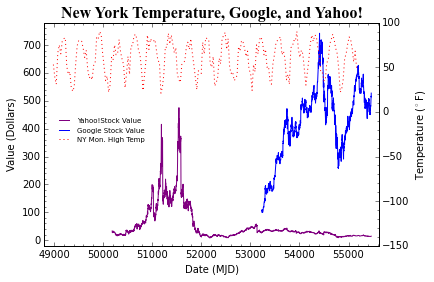

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

yahoo = ax1.plot(yahoo_data[:,0], yahoo_data[:,1], color = 'purple', 
         linestyle = '-', label = "Yahoo!Stock Value")
google = ax1.plot(google_data[:,0], google_data[:,1], color = 'blue', 
         linestyle = '-', label = "Google Stock Value")

# add secondary y axis
ax2 = ax1.twinx()
temps = ax2.plot(ny_temps[:,0], ny_temps[:,1], color = 'red', 
         linestyle = ':', label = "NY Mon. High Temp")

# add legend together
data = yahoo + google + temps
labs = [l.get_label() for l in data]
ax1.legend(data, labs, loc=(0.03,.45), prop={'size':7}, frameon=False)

ax1.set_title("New York Temperature, Google, and Yahoo!", 
              size = 16, family='Times New Roman', fontweight="bold")
ax1.set_xlabel("Date (MJD)")
ax1.set_ylabel("Value (Dollars)")
ax2.set_ylabel("Temperature ($^\circ$F)")
ax1.set_xlim(48800, 55620)
ax1.set_ylim(-20, 780)
ax1.minorticks_on()
ax2.set_ylim(-150,100)
ax2.minorticks_on()

## Making Brushing Graphs

In [3]:
import pandas as pd

flowers = pd.read_table("Data/flowers.csv", sep=",").set_index("species")
flowers # (150, 4)

,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


In [5]:
import matplotlib.pyplot as plt
import sys
import matplotlib.patches as mpatches
import numpy as np


class Brusher(object):

    def __init__(self, data, colors):
        """ The following function initializes the brusher plots
        Parameters:
        data: pd.DataFrame - figure will have NxN subplots where N
                                is the number of features/columns 
        colors: np.ndarray - the colors group each row into categories 
                                accordingly
        Output: A figure which applies brushing 
                to plot many pairs of parameters 
                of a dataset in many subplots
        """
        self.data = data
        self.colors = colors
        
        # -------- Create the figure and axes ------------ #
        self.ndim = self.data.shape[1] # No. of features
        self.fig, self.axes = plt.subplots(self.ndim, self.ndim)
        
        # -------- Initialize Object's variables --------- #
        self.loc0 = None
        self.loc1 = None
        self.xy0 = None
        self.xy1 = None
        self.ax0 = None
        self.rect = None 
        self.ax_dict = {} # dictionary to store the axis keys
        self.ax_data = {} # dictionary to store the axis data

        for x, xstat in enumerate(self.data.columns):
            for y, ystat in enumerate(self.data.columns):

                # get the axis, and save the column names that
                # correspond to it
                ax = self.axes[y, x]
                self.ax_dict[str(ax)] = (xstat, ystat)
                # plot the data and save it for later in ax_data
                self.ax_data[x, y]= ax.scatter(
                    self.data[xstat], self.data[ystat])

                # set the axis limits iand ticks
                ax.set_xlim(self.data[xstat].min(), self.data[xstat].max())
                ax.set_ylim(self.data[ystat].min(), self.data[ystat].max())
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])

                # plot a label on the diagonal plots
                if xstat == ystat:
                    ax.text(0.1, 0.85, xstat, transform=ax.transAxes)

        # --------------- Setup Colors of data ---------------- #
        self.update_colors()
        
        # --------------- Setup Figure Sizes ------------------ #
        self.fig.set_figwidth(10)
        self.fig.set_figheight(10)
        
        # --------------- Draw figures ----------------- #
        self.fig.show()
        self.flush()
        
        # Registering MPL events and saving IDs
        self.cids = {}
        self.cids['button_press_event'] = self.fig.canvas.mpl_connect('button_press_event', self.press)
        self.cids['button_release_event'] = self.fig.canvas.mpl_connect('button_release_event', self.release)
        self.cids['key_press_event'] = self.fig.canvas.mpl_connect('key_press_event', self.clear)
        

    def update_colors(self, pick = None):
        """ Description:
            Update colors of the points in all subplots; 
            Non-selected Points are turned to gray when pick is not None
            
            Parameter: 
            pick: boolean numpy.ndarray
                  Points which are false are set to gray
        """
        # update colors
        colors = self.colors.copy()
        if pick is not None:
            colors[~pick] = (0, 0, 0, 0.1)
            
        # set the colors for each axis
        for (x, y), data in self.ax_data.items():
            data.set_color(colors)
            
    def flush(self):
        """
        Desciption:
        Flush std out and draw canvas - to make sure everything is written right now
        """
        sys.stdout.flush()
        self.fig.canvas.draw()
        
    def press(self, event):
        """
        Description (Handler):
        Mouse Button Press Event
        """
        # ------ Handling misses --------#
        # If there's a selection already/misses: Don't do anything 
        if self.xy0 or (event.inaxes is None):
            return
        
        # save global mouse location, the axis coordinates, and axis objects
        self.loc0 = (event.x, event.y)
        self.xy0 = (event.xdata, event.ydata)
        self.ax0 = event.inaxes
        
        # create a new rectangle patch and add it to the axis
        self.rect = mpatches.Rectangle(self.xy0, 0, 0, color = 'k', alpha = 0.1)
        self.ax0.add_patch(self.rect)
        
        self.flush()
        
    def release(self, event):
        """
        Description (Handler):
        Mouse Button Release Event
        """
        # ------ Handling misses and non-selections --------#
        # If there's a selection already/misses: Don't do anything 
        if self.xy1 or (self.xy0 is None) or (event.inaxes is None):
            return
        
        # save global mouse location, the axis coordinates, and axis objects
        self.loc1 = (event.x, event.y)
        self.xy1 = (event.xdata, event.ydata)
        
        if self.ax0 != event.inaxes:
            print("Warning: INVALID SELECTON/MISS")
        else: 
            width = self.xy1[0] -self.xy0[0]
            height = self.xy1[1] - self.xy0[1]
            area = np.abs(width * height)
            if area < 0.001:
                self.reset_fig()
            else:
                # Update the wifth and heigh of rectangle of selection
                self.rect.set_width(width)
                self.rect.set_height(height)
                # Picking points we want to highlight in all subplots
                self.pick_points()
                
        self.flush()
        
        
        
    def reset_fig(self):
        """
        Description: 
        Reset the selected area once mouse is released
        """
        # ------- Removing selection --------- #
        if self.rect:
            self.rect.remove()
            self.rect = None
        
        self.update_colors()
        
        self.loc0 = None
        self.xy0 = None
        self.ax0 = None
        self.loc1 = None
        self.xy1 = None

    

    def clear(self, event):
        """
        Description: 
        Reset the selected area once mouse is released
        """
        if event.key != "d":
            return
        if (self.loc0 is None) or (self.loc1 is None):
            return
        
        # Determine if the mouse was inside the selection
        xy = np.array([self.loc0, self.loc1]).T
        xmin = xy[0].min()
        xmax = xy[0].max()
        ymin = xy[1].min()
        ymax = xy[1].max()
        inregion = ((event.x > xmin) and (event.x < xmax) and (event.y > ymin) and (event.y < ymax))
        
        # If is was selected, then rest the point
        if inregion:
            self.reset_fig()
            self.flush()
    

    def pick_points(self):
        """Choose the points that are in the selection and update their
        colors.

        """

        # get the bounds of the selection
        xy = np.array([self.xy0, self.xy1]).T
        xmin = xy[0].min()
        xmax = xy[0].max()
        ymin = xy[1].min()
        ymax = xy[1].max()

        # get the data corresponding to the subplot we've made the
        # selection in
        xstat, ystat = self.ax_dict[str(self.ax0)]
        xdata = np.asarray(self.data[xstat])
        ydata = np.asarray(self.data[ystat])

        # determine which points to pick
        pick = ((xdata > xmin) &
                (xdata < xmax) &
                (ydata > ymin) &
                (ydata < ymax))

        # update the colors
        self.update_colors(pick=pick)

      

In [6]:
# compute the colors we want
color_map = {
    'setosa': (0.6, 0, 0, 0.4),
    'versicolor': (0, 0.6, 0, 0.4),
    'virginica': (0, 0, 0.6, 0.4)
}
colours = np.array([color_map[x] for x in flowers.index])  

E:\Program Files (x86)\Anaconda-2.3.0\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


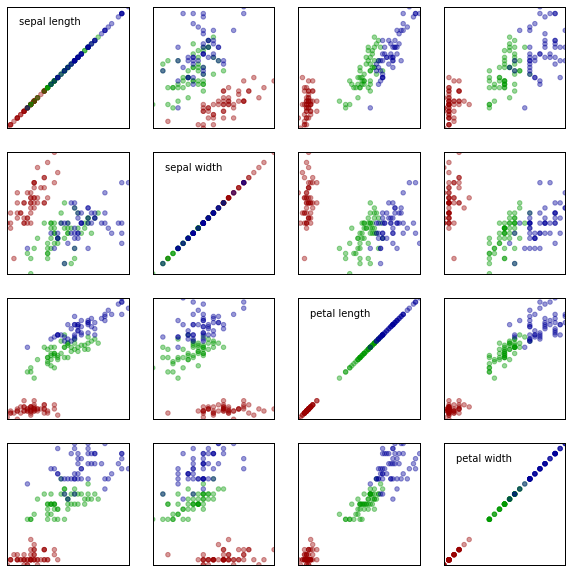

In [7]:
df = Brusher(flowers, colours)